In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import seaborn as sns

In [2]:
df = pd.read_csv('tic-tac-toe.data')
df.head()

x x.1 x.2 x.3  o o.1 x.4 o.2 o.3  positive
0  x   x   x   x  o   o   o   x   o  positive
1  x   x   x   x  o   o   o   o   x  positive
2  x   x   x   x  o   o   o   b   b  positive
3  x   x   x   x  o   o   b   o   b  positive
4  x   x   x   x  o   o   b   b   o  positive

In [3]:

df.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
print(df.columns)
df.describe()


Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'], dtype='object')


C1   C2   C3   C4   C5   C6   C7   C8   C9       C10
count   957  957  957  957  957  957  957  957  957       957
unique    3    3    3    3    3    3    3    3    3         2
top       x    x    x    x    x    x    x    x    x  positive
freq    417  377  417  377  458  378  417  378  418       625

array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

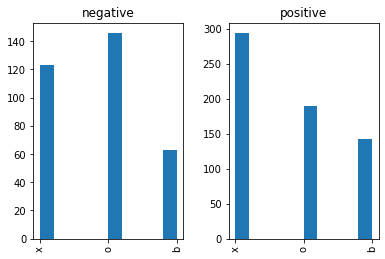

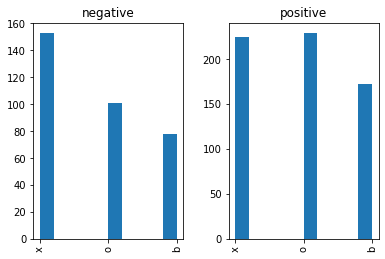

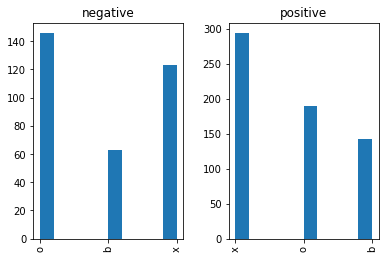

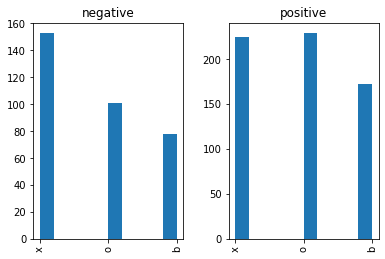

In [4]:
df.C1.hist(by=df.C10)
df.C2.hist(by=df.C10)
df.C3.hist(by=df.C10)
df.C4.hist(by=df.C10)

<AxesSubplot:>

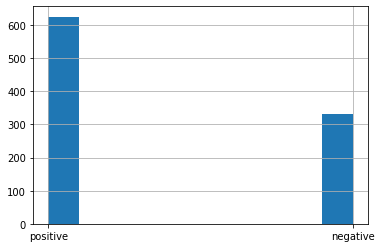

In [5]:
df.C10.hist()

In [6]:
df.replace('x',0,inplace=True)
df.replace('o',1,inplace=True)
df.replace('b',2,inplace=True)
df.head()

C1  C2  C3  C4  C5  C6  C7  C8  C9       C10
0   0   0   0   0   1   1   1   0   1  positive
1   0   0   0   0   1   1   1   1   0  positive
2   0   0   0   0   1   1   1   2   2  positive
3   0   0   0   0   1   1   2   1   2  positive
4   0   0   0   0   1   1   2   2   1  positive

In [7]:
df.replace('negative',0,inplace=True)
df.replace('positive',1,inplace=True)
df.head()

C1  C2  C3  C4  C5  C6  C7  C8  C9  C10
0   0   0   0   0   1   1   1   0   1    1
1   0   0   0   0   1   1   1   1   0    1
2   0   0   0   0   1   1   1   2   2    1
3   0   0   0   0   1   1   2   1   2    1
4   0   0   0   0   1   1   2   2   1    1

## Hold out method

In [8]:
X = df[['C1','C2','C3','C4','C5','C6','C7','C8','C9']]
y = df['C10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,roc_auc_score,roc_curve

In [10]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
print(y_pred[:10])
print(y_test[:10])

[1 0 1 1 0 1 0 1 1 1]
241    1
848    0
436    1
386    1
345    1
311    1
871    0
267    1
35     1
78     1
Name: C10, dtype: int64


## Model evaluation

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average="macro"))
print("Recall:",metrics.recall_score(y_test, y_pred,average="macro"))
print("F1-Score:",metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy: 0.8576388888888888
Precision: 0.8526881720430108
Recall: 0.8342391304347826
F1-Score: 0.8418493765318833


In [13]:
count_misclassified = (y_pred!=y_test).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 41


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       104
           1       0.87      0.92      0.89       184

    accuracy                           0.86       288
   macro avg       0.85      0.83      0.84       288
weighted avg       0.86      0.86      0.86       288



0.8417642140468227


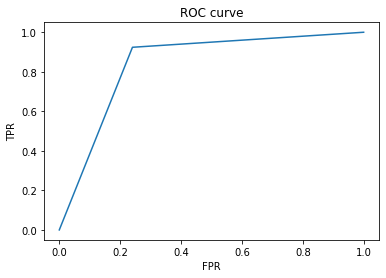

AUC =  0.8342391304347826


In [15]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
predictions = dt.predict_proba(X_test)
print(roc_auc_score(y_test,predictions[:,1]))
fpr,tpr,_ = roc_curve(y_test,predictions[:,1])
plt.clf()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print("AUC = ",roc_auc_score(y_test,y_pred))

## Visualization

In [16]:
!pip install graphviz
!pip install pydotplus
!pip install six


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from sklearn import tree
from IPython.display import Image
import pydotplus

In [18]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |   |  

In [19]:
fn = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
class_name = ['Positive','Negative']
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(clf, 
                   feature_names=fn,  
                   class_names=class_name,
                   filled=True)
fig.savefig("dtree.png")

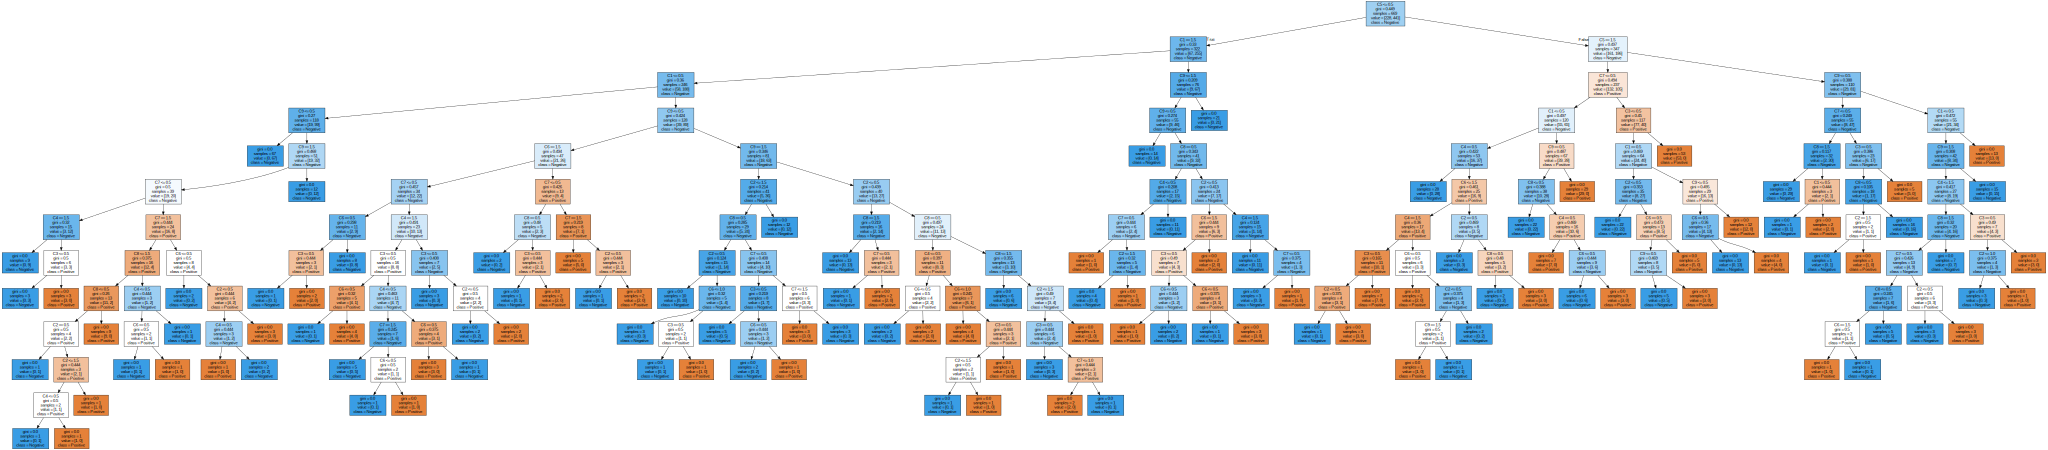

In [20]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=fn,  
                                class_names=class_name,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [21]:
graph.render("DT_graphivz")

'DT_graphivz.png'